## Data Understanding

#### Given dataset  contains 2 columns i.e YearsExperience, Salary (salary regarding years of experience).  

#### Now we need to find out whether there is a relationship between between the YearsExperience and salary using Simple Linear Regression Model. 

#### If there is a relationship between the variables then we need to build a model to predict the salary hike depending on the years of experience.
#### Here : YearsExperience is a Independent variable and                                                                                                       Salary is a Dependent variable

## Data Preprocessing

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
#import libraries
import pandas as pd
import seaborn as sns

In [2]:
#Read the given CSV file
data=pd.read_csv(r"C:\Users\hp\Downloads\Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#### Let's perform some tasks to understand the data like shape,info, and describe.

In [5]:
#Shows number of records and columns in a dataset
data.shape

(30, 2)

In [6]:
#Using the info() we can see whether there are any null values in the data. If yes, then we have to do
#some data manipulation.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


As we can observe there are no null values present in the data

In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Data Visualization

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

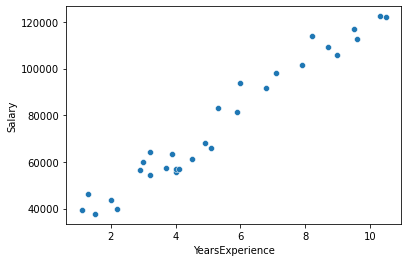

In [8]:
sns.scatterplot(x=data['YearsExperience'],y=data['Salary'])

#### If we cannot determine the correlation using a scatter plot, we can use the seaborn heatmap to visualize the data.

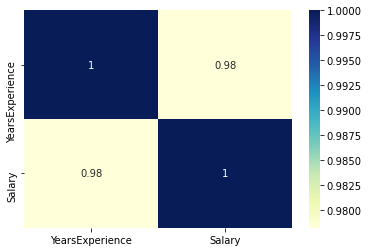

In [10]:
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

As we can see from the above graphs, the YearsExperience column seems most correlated to Salary.

In [12]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

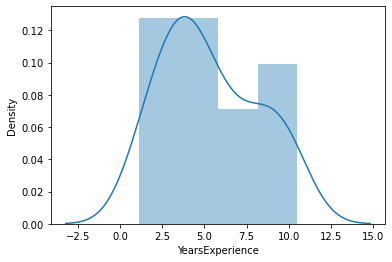

In [13]:
sns.distplot(data['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

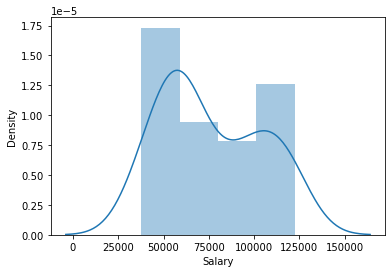

In [10]:
sns.distplot(data['Salary'])

## Model Building

#### Building a model using statsmodel 

In [17]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=data).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

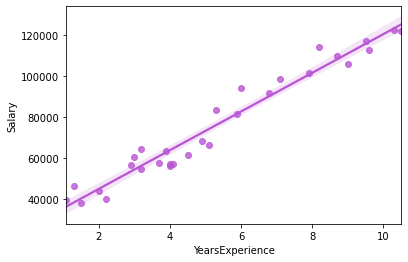

In [12]:
sns.regplot(x="YearsExperience",y="Salary", data=data, color='mediumorchid')

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        02:44:34   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking for outliers using Cook's Distance

In [33]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

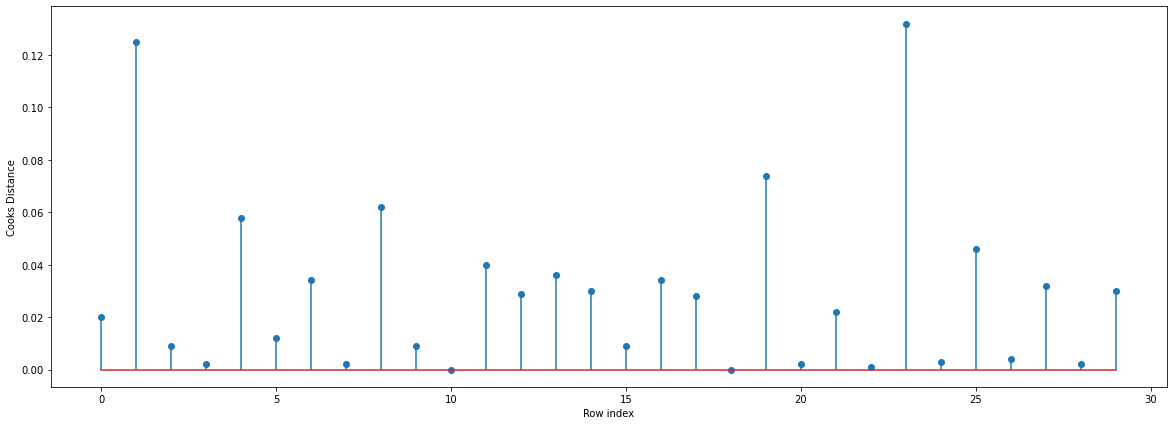

In [38]:
#Plot the influencers values using stem plot
import numpy as np
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
(np.argmax(c),np.max(c))

(23, 0.131754523131353)

#### Remove the outliers the from the data and rebuild the model.

In [42]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [52]:
#Removing outliers
data1=data.drop(data.index[[1,23]],axis=0).reset_index()

In [70]:
data1

,index,YearsExperience,Salary
0,0,1.1,39343.0
1,2,1.5,37731.0
2,3,2.0,43525.0
3,4,2.2,39891.0
4,5,2.9,56642.0
5,6,3.0,60150.0
6,7,3.2,54445.0
7,8,3.2,64445.0
8,9,3.7,57189.0
9,10,3.9,63218.0


In [64]:
#Rebuiding model with new data
model1=smf.ols("Salary~YearsExperience",data=data).fit()

In [46]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        16:55:14   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1) The coefficient for YearsExperience is 9449.9623 and its corresponding p-value is very low, almost 0.That means the coefficient is statistically significant.
### 2) As R-squared value is same even after removing the outliers 0.957, which means those data points are insignificant to the set.Here the 0.957 means that 95.7% Salary variance can be explained by the YearsExperience column using this line.
### Thus the model fit is statistically significant.

## Model Evaluation

#### Predicting y value from the training dataset of x using the predict attribute. After that, we'll create the Residuals from the predicted data.

In [53]:
y_prdct=model1.predict(data1.YearsExperience)

In [54]:
y_prdct

0      36187.158752
1      39967.143681
2      44692.124842
3      46582.117306
4      53197.090931
5      54142.087163
6      56032.079627
7      56032.079627
8      60757.060788
9      62647.053252
10     63592.049484
11     63592.049484
12     64537.045717
13     68317.030645
14     72097.015574
15     73987.008038
16     75877.000502
17     81546.977895
18     82491.974127
19     90051.943985
20     92886.932681
21    100446.902538
22    108006.872395
23    110841.861092
24    115566.842252
25    116511.838485
26    123126.812110
27    125016.804574
dtype: float64

In [62]:
res = (data1.Salary - y_prdct)

#### Let's plot histogram of the Residuals

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


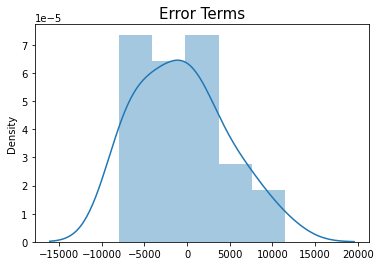

In [63]:
fig = plt.figure()
sns.distplot(res)
plt.title('Error Terms', fontsize = 15)
plt.show()

As we can see, the residuals are following the normal distribution graph with a mean almost 0.

#### Scatter plot of Residual values

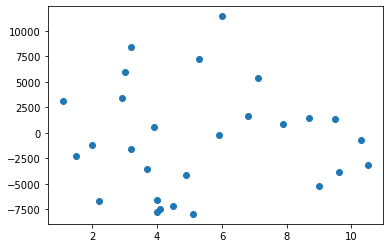

In [65]:
plt.scatter(data1.YearsExperience,res)
plt.show()

Here, Residuals do not follow any specific pattern

### Since the Residuals follow a normal distribution and  do not follow any specific pattern, we can apply this linear regression model to test the unseen data. 

### Predictions on the unseen data using our model

In [67]:
newdata1=pd.Series([5.8,11.0,8,6.3,10.6])

In [68]:
data_years1=pd.DataFrame(newdata1,columns=['YearsExperience'])
data_years1

,YearsExperience
0,5.8
1,11.0
2,8.0
3,6.3
4,10.6


In [69]:
model1.predict(data_years)

0     80601.981663
1    129741.785735
2    101391.898770
3     85326.962824
4    125961.800806
dtype: float64

### we can apply the model to unseen data as above and can predict the salary hike.